In [1]:
# Problem 0: I've installed Quiskit and it was not a problem at all

In [2]:
# Problem 1: Extracting Qubit phase. 

In [3]:
# First idea was to measure the system in the different basis, in this case |+ > and |- >
# but we have access only to |0 > and |1 >, so we have to rotate the qbit, measure 
# in superposition basis, and calculate the angle: 
# cosine phi = (2 * probability|+> - 1) / sine theta

In [4]:
import qiskit 
from qiskit import IBMQ,Aer
from math import pi, acos, sin, cos
qiskit.__qiskit_version__
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram


In [5]:
IBMQ.load_account()


/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
q = qiskit.QuantumRegister(1)
c = qiskit.ClassicalRegister(1)
circuit = qiskit.QuantumCircuit(q, c)
thetaAngle = pi/2 #something distinguish from pi*n
phiAngle = pi/2
circuit.u(thetaAngle, phiAngle, 0, q[0])
circuit.h(q[0])
measureZ = qiskit.QuantumCircuit(q,c)
measureZ.measure(q,c)
testZ = circuit + measureZ



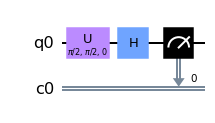

In [8]:
testZ.draw('mpl') # visualize the circuit

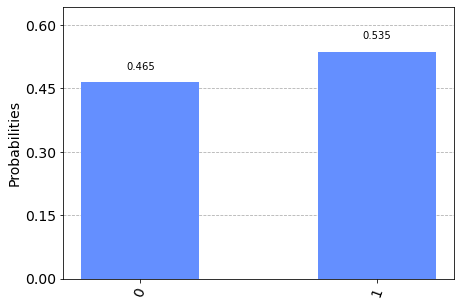

In [9]:
# run in the cloud

shotsN = 1024
backend  = my_provider.get_backend('ibmq_5_yorktown')
jobIBM = qiskit.execute([testZ],backend = backend, shots = shotsN)
result = jobIBM.result()
res = result.get_counts(testZ)
plot_histogram([res])

In [10]:
acos((2 * res['0'] / shotsN - 1) / sin(thetaAngle)) / pi # phi angle in pi

0.5223996465316074

In [11]:
# Problem 2. Single Qubit state preparation

In [12]:
# straightforward using U
qu = qiskit.QuantumRegister(1)
cu = qiskit.ClassicalRegister(1)
circuitu = qiskit.QuantumCircuit(qu, cu)
circuitu.u(pi/3, pi/3, 0, qu[0])
circuitu.h(qu[0])
measureU = qiskit.QuantumCircuit(qu,cu)
measureU.measure(qu,cu)
testU = circuitu + measureU

In [13]:
# more sophisticated: a) rotate 90 using H b) rotate phi on pi/3 c) rotate H 
# d) rotate phi on pi/3 once again e) rotate sqrt(Z) = S
# remind rubik's cube rotation

In [14]:
qm = qiskit.QuantumRegister(1)
cm = qiskit.ClassicalRegister(1)
circuitm = qiskit.QuantumCircuit(qm, cm)
circuitm.h(qm[0])
circuitm.rz(pi/3, qm[0])
circuitm.h(qm[0])
circuitm.rz(pi/3, qm[0])
circuitm.s(qm[0])
circuitu.h(qu[0])
measureM = qiskit.QuantumCircuit(qm,cm)
measureM.measure(qm,cm)
testM = circuitm + measureM

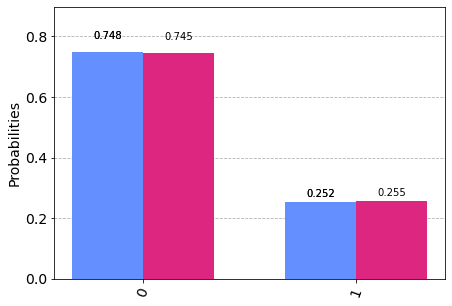

In [16]:
shotsN = 1024
backend  = my_provider.get_backend('ibmq_ourense')

jobIBM = qiskit.execute([testU],backend = backend, shots = shotsN)
resultU = jobIBM.result()
resU = resultU.get_counts(testU)

jobIBM = qiskit.execute([testM],backend = backend, shots = shotsN)
resultM = jobIBM.result()
resM = resultM.get_counts(testM)

plot_histogram([resU, resM])

In [17]:
# error of straightforward implementation
acos((2 * resU['0'] / shotsN - 1) / sin(pi/3)) / (pi / 3) - 1

-0.08247477378378754

In [18]:
# error of 	compound implementation
acos((2 * resM['0'] / shotsN - 1) / sin(pi/3)) / (pi / 3) - 1

-0.07461496486722718

In [20]:
import numpy as np



# Problem 3. Prove following identities

# 3.1. HXH = Z

H = 1/2**(1/2)*np.array([[1., 1.],
                         [1.,-1.]])

X = np.array([[0.,1.],
              [1.,0.]])

Z = np.array([[1., 0.],
              [0.,-1.]])


In [21]:
# Compare HXH 

print (H.dot(X.dot(H)) )

[[ 1.  0.]
 [ 0. -1.]]


In [22]:
# and Z

print (Z)


[[ 1.  0.]
 [ 0. -1.]]


In [23]:
# 3.2. 2-qbit controlled Z 

SWAP = np.array([[1.,0.,0.,0.],
                 [0.,0.,1.,0.],
                 [0.,1.,0.,0.],
                 [0.,0.,0.,1.]])

CZ   = np.array([[1.,0.,0., 0.],
                 [0.,1.,0., 0.],
                 [0.,0.,1., 0.],
                 [0.,0.,0.,-1.]])

# Compare CZ with swapped CZ

print (SWAP.dot(CZ.dot(SWAP)))

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


In [24]:
# 3.3. (H(x)H)CX(H(x)H) = swapped CX

HxH =  np.array([[0.5, 0.5, 0.5, 0.5],
                 [0.5,-0.5, 0.5,-0.5],
                 [0.5, 0.5,-0.5,-0.5],
                 [0.5,-0.5,-0.5, 0.5]])

CX   = np.array([[1.,0.,0.,0.],
                 [0.,1.,0.,0.],
                 [0.,0.,0.,1.],
                 [0.,0.,1.,0.]])

# Compare (H(x)H)CX(H(x)H) 

print (HxH.dot(CX.dot(HxH)))

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [25]:
# and swapped CX

print (SWAP.dot(CX.dot(SWAP)))


[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [26]:
# 3.4. CR(phi) = U1(phi)(x)I

# [1 0     ]     [1 0]     [1 0 0      0     ]
# [0 e^iphi] (x) [0 1]  =  [0 1 0      0     ]
#                          [0 0 e^iphi 0     ]
#                          [0 0 0      e^iphi]
   